In [1]:
import torch 
from backtesting import Backtester
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

sp500 = yf.Ticker("ES=F")
sp500_data = sp500.history(start="2010-01-01", end="2024-05-01")
sp500_data = pd.DataFrame(sp500_data)[['Open','High', 'Low', 'Close', 'Volume']]
sp500_data['Date'] = pd.to_datetime(sp500_data.index, utc=True)
sp500_data['Date'] = sp500_data['Date'].dt.strftime('%Y-%m-%d')
sp500_data.reset_index(drop=True, inplace=True)

# Data params
WINDOWS_SIZE = 30
TRAIN_START = "2010-01-01"
TRAIN_END = "2018-06-01"
TEST_DURATION=12

# Networks params
INPUT_SIZE = 4
FEATURE_SEQ = 30
HIDDEN_SIZE = 32
ACTION_SPACE = 1
RELU_SLOPE = 0.01
KERNEL_SIZE=3
STRIDE=1
DROPOUT=0.2
MAXPOOL_KERNEL=2
MAXPOOL_STRIDE=2
LR_ACTOR = 1e-4
LR_CRITIC = 1e-3
CRITERION = torch.nn.MSELoss()

# Agent params
BATCH_SIZE = 128
MEMORY_SIZE = 10000
UPDATE_FREQ = 100
EXPLORATION_RATE = 1
EXPLORATION_DECAY = 0.9
EXPLORATION_MIN = 0.01
MIN_TRAIN_EPISODES = 2
MAX_EPISODES = 50
EARLY_STOP = 5
TRANSACTION_COST = 0.0002
RISK_SENSITIVITY = 0.3

                    


backtester = Backtester(sp500_data, window_size=WINDOWS_SIZE, train_start_date=TRAIN_START, 
                    train_end_date=TRAIN_END, test_duration=TEST_DURATION, input_size=INPUT_SIZE, 
                    feature_seq=FEATURE_SEQ, hidden_size=HIDDEN_SIZE, action_space=ACTION_SPACE, 
                    kernel_size=KERNEL_SIZE, stride=STRIDE, relu_slope=RELU_SLOPE, dropout=DROPOUT,
                    maxpool_kernel=MAXPOOL_KERNEL, maxpool_stride=MAXPOOL_STRIDE, lr_policy=LR_ACTOR, 
                    lr_critic=LR_CRITIC, criterion=CRITERION, batch_size=BATCH_SIZE, memory_size=MEMORY_SIZE,
                    update_freq=UPDATE_FREQ, exploration_rate=EXPLORATION_RATE, 
                    exploration_decay=EXPLORATION_DECAY, exploration_min=EXPLORATION_MIN, max_episodes=MAX_EPISODES, 
                    min_train_episodes=MIN_TRAIN_EPISODES, early_stop=EARLY_STOP, 
                    transaction_cost=TRANSACTION_COST, risk_sensitivity=RISK_SENSITIVITY, plot_loss=False)
                    
actions_test, returns_test = backtester.runDDPG()

[W NNPACK.cpp:79] Could not initialize NNPACK! Reason: Unsupported hardware.
/opt/anaconda3/envs/Practicum/lib/python3.9/site-packages/torch/nn/functional.py:652: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool1d(input, kernel_size, stride, padding, dilation, ceil_mode)


Train starting for split 0
Starting episode 1
Early stopping after 7 episodes
Best actor/critic weights saved and loaded into the test model after ep:7
Train finished for split 0
Starting test ...
Test finished
Split 0 finished
Train starting for split 1
Starting episode 1
Early stopping after 7 episodes
Best actor/critic weights saved and loaded into the test model after ep:7
Train finished for split 1
Starting test ...
Test finished
Split 1 finished
Train starting for split 2
Starting episode 1
Early stopping after 7 episodes
Best actor/critic weights saved and loaded into the test model after ep:7
Train finished for split 2
Starting test ...
Test finished
Split 2 finished
Train starting for split 3
Starting episode 1
Early stopping after 7 episodes
Best actor/critic weights saved and loaded into the test model after ep:7
Train finished for split 3
Starting test ...
Test finished
Split 3 finished
Train starting for split 4
Starting episode 1
Starting episode 10
Early stopping after 1

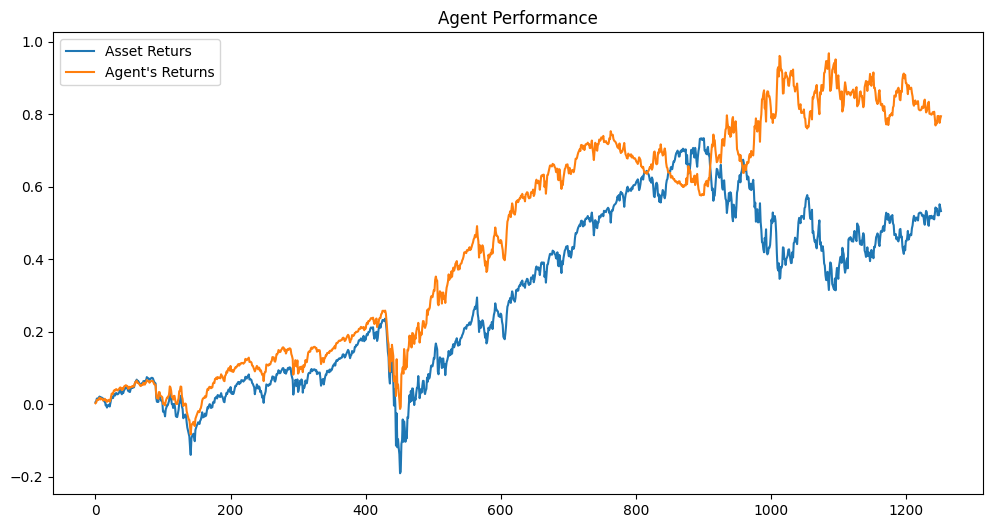

In [2]:
returns_test = pd.Series(returns_test)
alg_ret = pd.DataFrame(
    {
        'Ret': returns_test,
        'Positions': actions_test,
        'CumSP':  (1 + returns_test).cumprod() - 1,
        'AlgRet': returns_test * actions_test,
        'AlgRetCum': (1 + returns_test * actions_test).cumprod() - 1
    }
)
plt.figure(figsize=(12, 6))
plt.plot(alg_ret['CumSP'], label='Asset Returs')  
plt.plot(alg_ret['AlgRetCum'], label="Agent's Returns") 
plt.legend() 
plt.title("Agent Performance")
plt.show()